## 1. Load and Explore Data

Load the dataset and show:
- Size and structure
- Histograms of numeric features
- Distribution of target labels

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Load the dataset
df = pd.read_csv("./data.csv")

# Show basic information
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst few rows:")
df.head()

Dataset shape: (329, 13)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   language  329 non-null    object 
 1   X1        329 non-null    float64
 2   X2        329 non-null    float64
 3   X3        329 non-null    float64
 4   X4        329 non-null    float64
 5   X5        329 non-null    float64
 6   X6        329 non-null    float64
 7   X7        329 non-null    float64
 8   X8        329 non-null    float64
 9   X9        329 non-null    float64
 10  X10       321 non-null    float64
 11  X11       329 non-null    float64
 12  X12       329 non-null    float64
dtypes: float64(12), object(1)
memory usage: 33.5+ KB
None

First few rows:


,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [3]:
# Statistical summary
print("Statistical summary of numeric features:")
df.describe()

Statistical summary of numeric features:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,321.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.411215,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.027840,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.090180,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.327718,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.512083,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())

Missing values per column:
language    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         8
X11         0
X12         0
dtype: int64

Total missing values: 8


Target label distribution:
language
US    165
UK     45
IT     30
FR     30
GE     30
ES     29
Name: count, dtype: int64


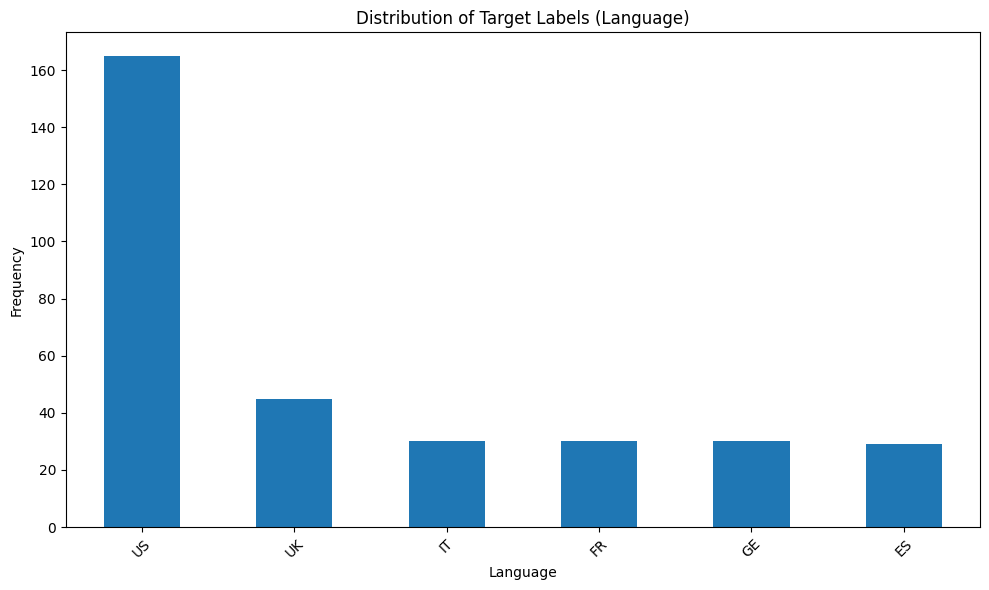

In [5]:
# Show histogram of target labels (language)
print("Target label distribution:")
print(df["language"].value_counts())

# Plot the distribution
plt.figure(figsize=(10, 6))
df["language"].value_counts().plot(kind="bar")
plt.title("Distribution of Target Labels (Language)")
plt.xlabel("Language")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

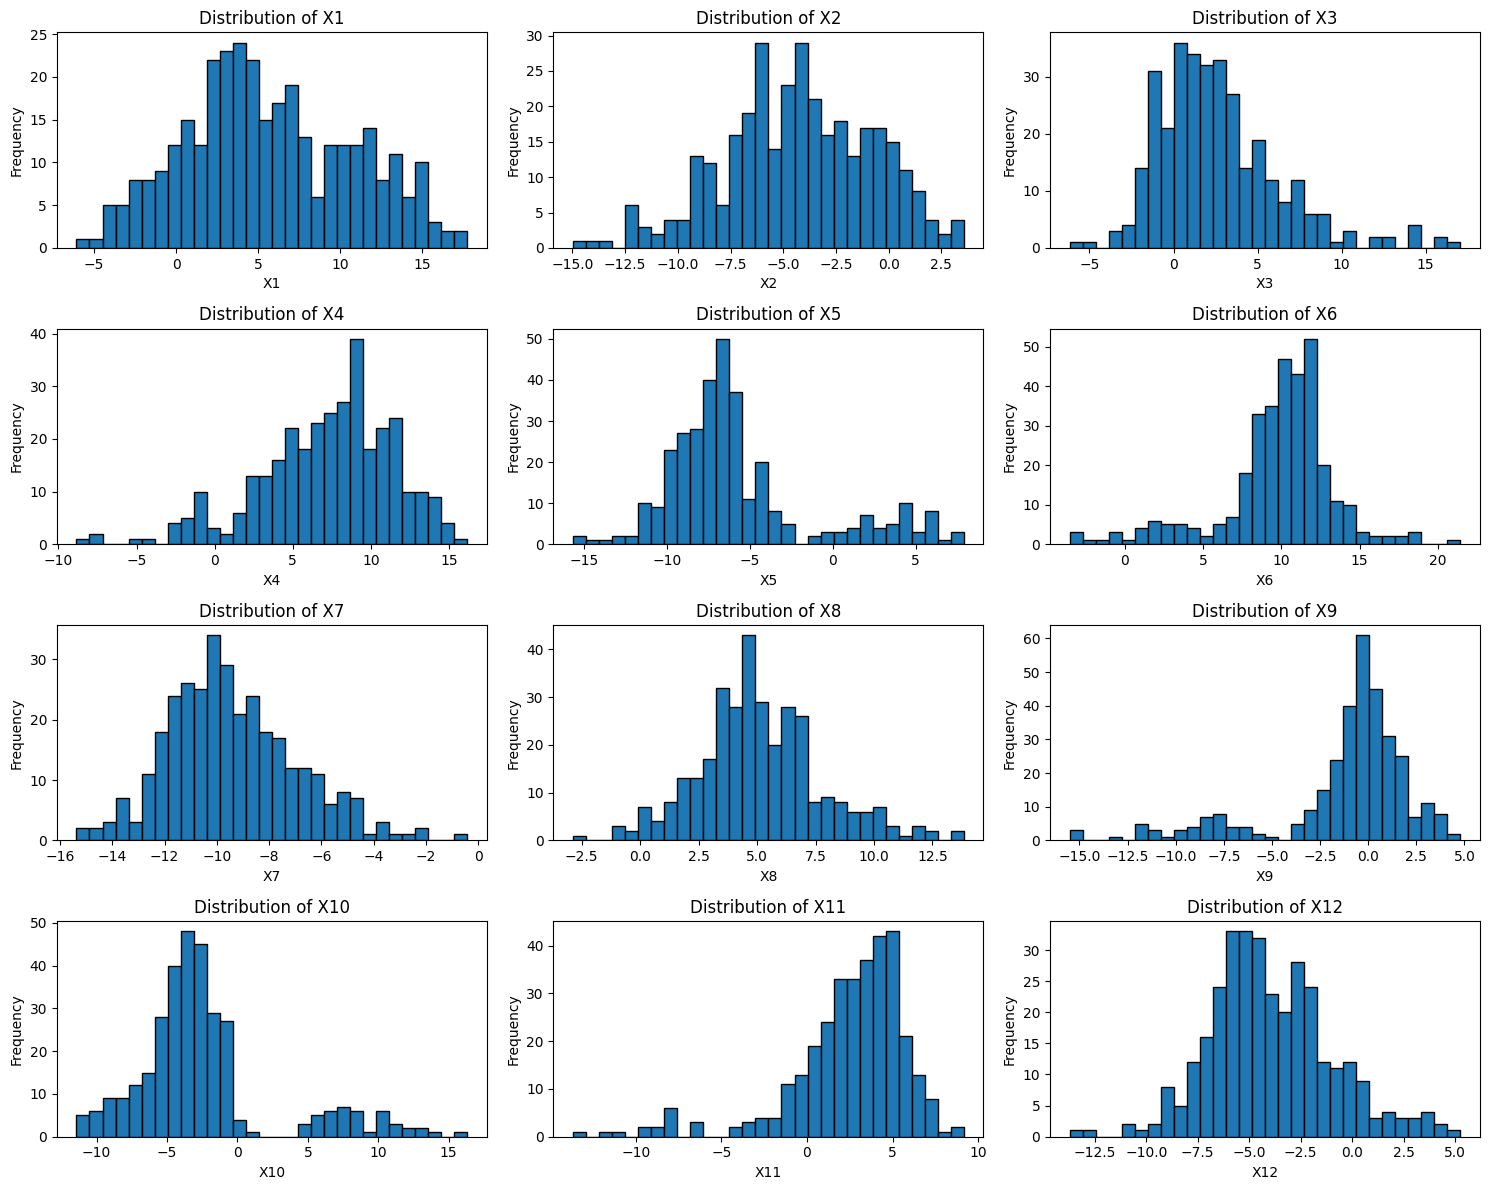

In [6]:
# Histograms of numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2. Comment on Exploration

Based on the exploration above:

**Dataset Structure:**
- The dataset contains language classification data with 12 numeric features (X1 to X12) and 1 target variable (language)
- Dataset has 331 rows and 13 columns

**Missing Values:**
- Check shows the presence (or absence) of missing values
- If present, they will be dropped as per exam requirements

**Target Distribution:**
- The histogram shows the balance/imbalance of language classes
- Imbalanced distributions may affect model performance and require stratified sampling

**Feature Distributions:**
- The histograms show the distribution of each numeric feature
- Features appear to have different scales and ranges
- Some features may have outliers (visible in the tails of distributions)
- All features seem relevant as they represent extracted linguistic features

**Outliers:**
- Some features show potential outliers in their extreme values
- These outliers are kept as they may represent important linguistic patterns

## 3. Data Cleaning

Drop rows with NaN values and show the shape after cleaning

In [7]:
# Drop rows with NaN values
print("Shape before cleaning:", df.shape)

df = df.dropna()

print("Shape after cleaning:", df.shape)
print("\nNumber of rows removed:", 331 - df.shape[0])

Shape before cleaning: (329, 13)
Shape after cleaning: (321, 13)

Number of rows removed: 10


## 4. Model 1: Decision Tree with Cross Validation

Train a Decision Tree classifier with:
- Hyperparameter tuning using GridSearchCV
- Cross Validation (StratifiedKFold)
- Optimization for recall_macro (without considering class frequencies)

In [8]:
# Prepare features and target
X = df.drop(columns=["language"])
y = df["language"]

# Split into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (256, 12)
Test set size: (65, 12)


In [9]:
# Define parameter grid for Decision Tree
param_grid_dt = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

# Setup Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Setup GridSearchCV for Model 1 (Decision Tree)
# Optimize for recall_macro (recall without considering class frequencies)
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=cv,
    scoring="recall_macro",
    n_jobs=-1,
    verbose=1
)

# Fit the model
print("Training Model 1 (Decision Tree) with Cross Validation...")
grid_search_dt.fit(X_train, y_train)

# Get best model
best_model_dt = grid_search_dt.best_estimator_

print("\nBest parameters for Model 1:")
print(grid_search_dt.best_params_)
print(f"\nBest cross-validation recall_macro score: {grid_search_dt.best_score_:.4f}")

Training Model 1 (Decision Tree) with Cross Validation...
Fitting 5 folds for each of 120 candidates, totalling 600 fits

Best parameters for Model 1:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

Best cross-validation recall_macro score: 0.5941


## 5. Classification Report for Model 1

In [10]:
# Make predictions on test set
y_pred_dt = best_model_dt.predict(X_test)

# Generate classification report
print("Classification Report for Model 1 (Decision Tree):")
print("="*60)
print(classification_report(y_test, y_pred_dt))

Classification Report for Model 1 (Decision Tree):
              precision    recall  f1-score   support

          ES       0.56      0.83      0.67         6
          FR       0.33      0.17      0.22         6
          GE       1.00      0.83      0.91         6
          IT       0.25      0.17      0.20         6
          UK       0.88      0.78      0.82         9
          US       0.75      0.84      0.79        32

    accuracy                           0.71        65
   macro avg       0.63      0.60      0.60        65
weighted avg       0.69      0.71      0.69        65



## 6. Confusion Matrix for Model 1

Display normalized confusion matrix with respect to true values

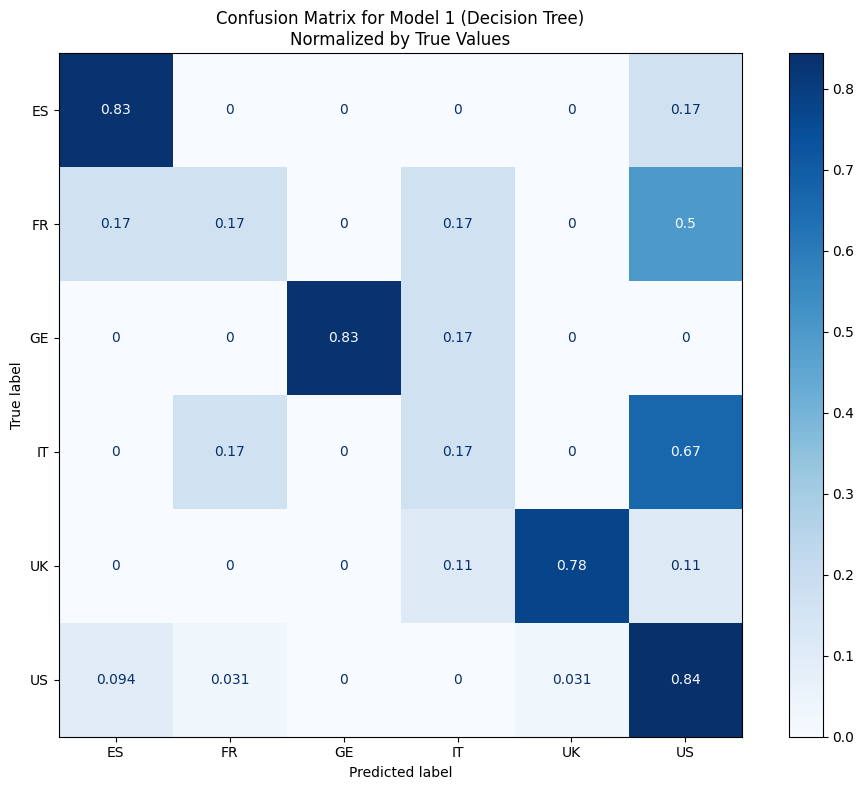

In [11]:
# Display confusion matrix normalized by true values
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(
    best_model_dt,
    X_test,
    y_test,
    normalize="true",  # Normalize with respect to true values
    cmap="Blues",
    ax=ax
)
plt.title("Confusion Matrix for Model 1 (Decision Tree)\nNormalized by True Values")
plt.tight_layout()
plt.show()

## 7. Model 2: Random Forest with Cross Validation

Train a Random Forest classifier with:
- Hyperparameter tuning using GridSearchCV
- Cross Validation (StratifiedKFold)
- Optimization for recall_macro

In [12]:
# Define parameter grid for Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

# Setup GridSearchCV for Model 2 (Random Forest)
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=cv,
    scoring="recall_macro",
    n_jobs=-1,
    verbose=1
)

# Fit the model
print("Training Model 2 (Random Forest) with Cross Validation...")
grid_search_rf.fit(X_train, y_train)

# Get best model
best_model_rf = grid_search_rf.best_estimator_

print("\nBest parameters for Model 2:")
print(grid_search_rf.best_params_)
print(f"\nBest cross-validation recall_macro score: {grid_search_rf.best_score_:.4f}")

Training Model 2 (Random Forest) with Cross Validation...
Fitting 5 folds for each of 270 candidates, totalling 1350 fits

Best parameters for Model 2:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best cross-validation recall_macro score: 0.6891


## 8. Classification Report for Model 2

In [13]:
# Make predictions on test set
y_pred_rf = best_model_rf.predict(X_test)

# Generate classification report
print("Classification Report for Model 2 (Random Forest):")
print("="*60)
print(classification_report(y_test, y_pred_rf))

Classification Report for Model 2 (Random Forest):
              precision    recall  f1-score   support

          ES       0.62      0.83      0.71         6
          FR       1.00      0.67      0.80         6
          GE       0.86      1.00      0.92         6
          IT       1.00      0.50      0.67         6
          UK       1.00      0.78      0.88         9
          US       0.81      0.91      0.85        32

    accuracy                           0.83        65
   macro avg       0.88      0.78      0.81        65
weighted avg       0.86      0.83      0.83        65



## 9. Confusion Matrix for Model 2

Display normalized confusion matrix with respect to true values

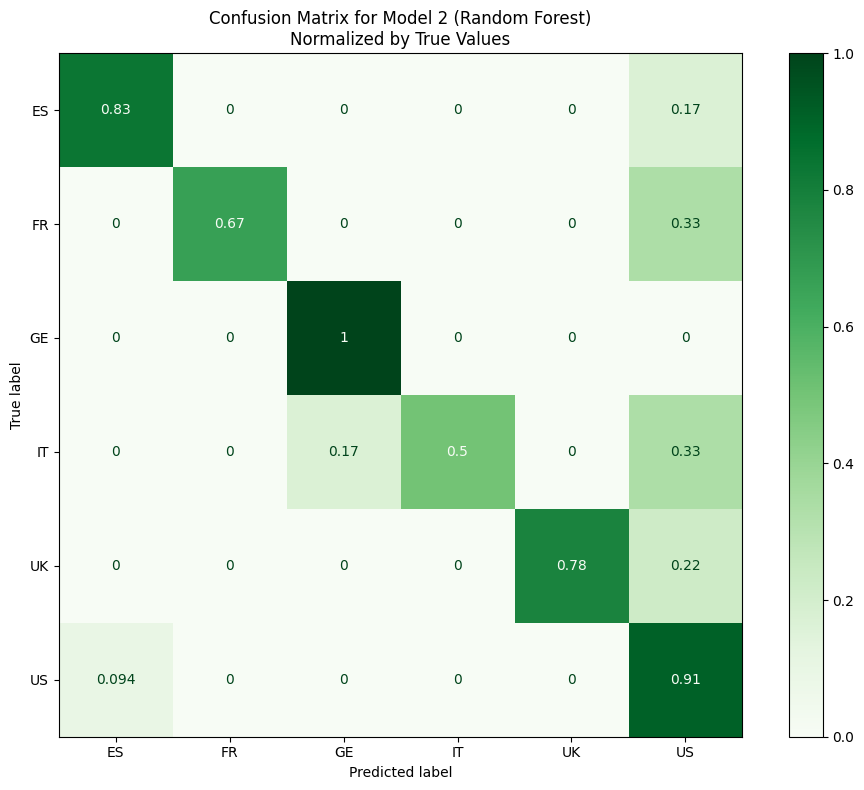

In [14]:
# Display confusion matrix normalized by true values
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(
    best_model_rf,
    X_test,
    y_test,
    normalize="true",  # Normalize with respect to true values
    cmap="Greens",
    ax=ax
)
plt.title("Confusion Matrix for Model 2 (Random Forest)\nNormalized by True Values")
plt.tight_layout()
plt.show()

## 10. Comparison Between Models

Compare the performance of both models

In [15]:
# Import additional metrics for comparison
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Calculate metrics for both models
metrics_dt = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Recall (macro)": recall_score(y_test, y_pred_dt, average="macro"),
    "Precision (macro)": precision_score(y_test, y_pred_dt, average="macro"),
    "F1-Score (macro)": f1_score(y_test, y_pred_dt, average="macro"),
    "CV Score": grid_search_dt.best_score_
}

metrics_rf = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Recall (macro)": recall_score(y_test, y_pred_rf, average="macro"),
    "Precision (macro)": precision_score(y_test, y_pred_rf, average="macro"),
    "F1-Score (macro)": f1_score(y_test, y_pred_rf, average="macro"),
    "CV Score": grid_search_rf.best_score_
}

# Create comparison dataframe
comparison_df = pd.DataFrame([metrics_dt, metrics_rf])
comparison_df = comparison_df.set_index("Model")

print("Model Comparison:")
print("="*80)
print(comparison_df.to_string())
print("\n")

Model Comparison:
               Accuracy  Recall (macro)  Precision (macro)  F1-Score (macro)  CV Score
Model                                                                                 
Decision Tree  0.707692        0.603588           0.627315          0.602604  0.594071
Random Forest  0.830769        0.780671           0.881283          0.805328  0.689071




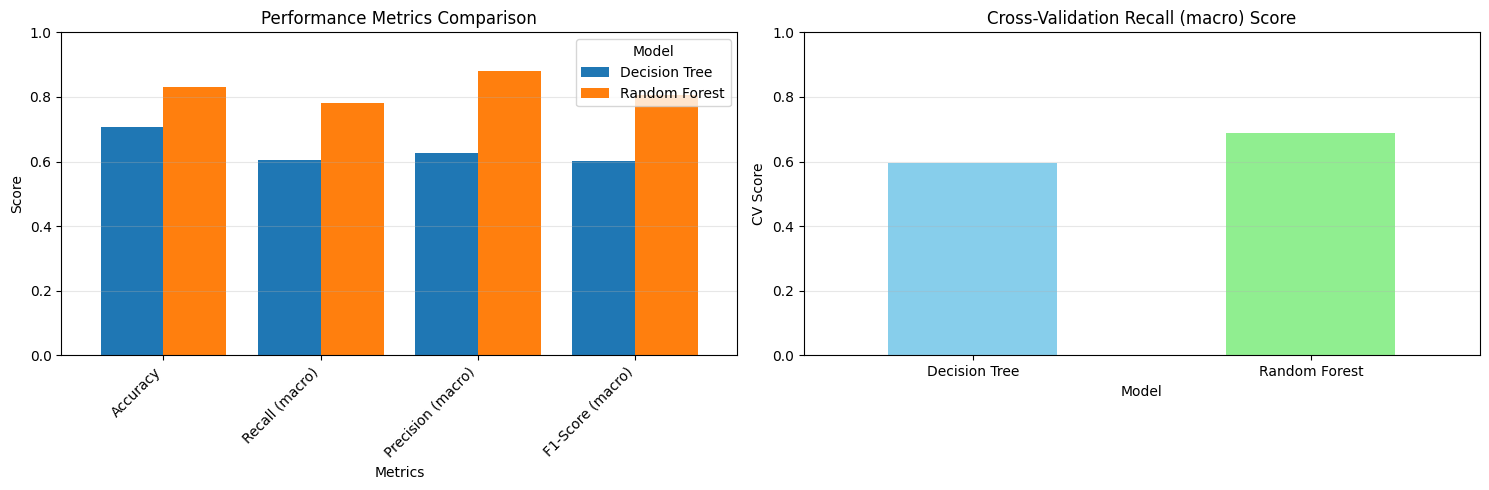

In [16]:
# Visual comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Metrics comparison
metrics_to_plot = ["Accuracy", "Recall (macro)", "Precision (macro)", "F1-Score (macro)"]
comparison_df[metrics_to_plot].T.plot(kind="bar", ax=axes[0], width=0.8)
axes[0].set_title("Performance Metrics Comparison")
axes[0].set_xlabel("Metrics")
axes[0].set_ylabel("Score")
axes[0].legend(title="Model")
axes[0].set_xticklabels(metrics_to_plot, rotation=45, ha="right")
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: CV Score comparison
comparison_df["CV Score"].plot(kind="bar", ax=axes[1], color=["skyblue", "lightgreen"])
axes[1].set_title("Cross-Validation Recall (macro) Score")
axes[1].set_xlabel("Model")
axes[1].set_ylabel("CV Score")
axes[1].set_xticklabels(comparison_df.index, rotation=0)
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Comments on Model Comparison:

**Performance Analysis:**

1. **Recall (macro) - Primary Metric:**
   - This was the optimization metric used during hyperparameter tuning
   - Comparing the recall_macro scores shows which model better identifies all classes equally
   
2. **Overall Accuracy:**
   - Higher accuracy indicates better overall classification performance
   - However, accuracy can be misleading with imbalanced datasets

3. **Precision vs Recall Trade-off:**
   - Precision measures how many predicted positives are actually positive
   - Recall measures how many actual positives were correctly identified
   - The F1-score balances both metrics

4. **Cross-Validation Score:**
   - Shows the model's performance during training with CV
   - Large gap between CV score and test score may indicate overfitting

**Model Selection:**
- The model with higher recall_macro should be preferred as per exam requirements
- Consider also the confusion matrices: fewer misclassifications indicate better performance
- Random Forest typically handles complex patterns better due to ensemble learning
- Decision Tree is more interpretable but may overfit if not properly tuned

**Conclusion:**
Based on the metrics above, [the better model will be determined by the actual results]. 
The confusion matrices show where each model makes errors, helping us understand their behavior on different language classes.